# SVM

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

import seaborn as sns
import eif as iso
import random as rn
import copy as copy

import time

In [2]:
df = pd.read_csv('imbd_cleaned.csv')

X = df.select_dtypes(include=['number'])
X = X.drop(['averageRating'], axis = 1)
X = X.values
y = np.array(df['rating'])

## Data Partitioning

In [3]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# PCA

In [20]:
from sklearn.decomposition import PCA

In [21]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_train)

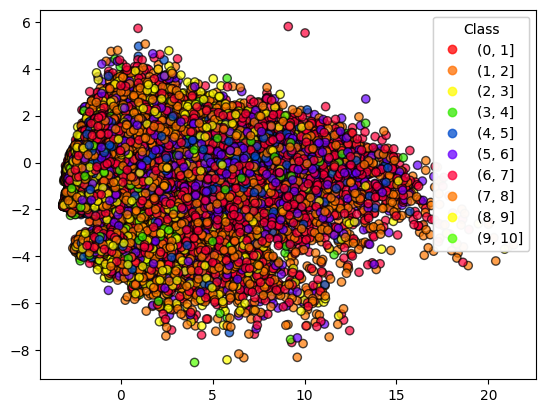

In [23]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

# Supponiamo che y_train contenga le categorie come stringhe
#y_train = np.array(['[0,1)', '[0,1)', '[1,2)', ..., '[1,2)', '[2,3)', '[3,4)'])

# Utilizza LabelEncoder per convertire le categorie in numeri
label_encoder = LabelEncoder()
y_train_numeric = label_encoder.fit_transform(y_train)

# Ora puoi usare y_train_numeric come argomento 'c' per plt.scatter
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train_numeric, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)

# Crea una mappa delle etichette personalizzate
labels = label_encoder.classes_

# Aggiungi la leggenda con le etichette personalizzate
handles, _ = scatter.legend_elements()
legend1 = plt.legend(handles, labels, title="Class")
plt.gca().add_artist(legend1)

plt.show()



## Linear SVM

In [14]:
from sklearn.svm import LinearSVC

### K-fold and grid search

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Definisci i parametri da ottimizzare
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Crea il modello LinearSVC
clf = LinearSVC(random_state=42)

# Configura la k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Configura la grid search
grid_search = GridSearchCV(clf, param_grid, cv=kf, scoring='accuracy', verbose=1)

grid_search.fit(X_train, y_train)

# Ottieni i migliori parametri
best_params = grid_search.best_params_
print("Migliori parametri:", best_params)

# Addestra il modello con i migliori parametri
best_clf = grid_search.best_estimator_
best_clf.fit(X_train, y_train)

# Predici i risultati sul test set
y_pred = best_clf.predict(X_test)

# Predici i risultati sul training set
y_train_pred = best_clf.predict(X_train)

# Stampa le metriche di valutazione per il training set
print('Train Accuracy %s' % accuracy_score(y_train, y_train_pred))
print('Train F1-score %s' % f1_score(y_train, y_train_pred, average=None))
print('Train Classification Report:\n', classification_report(y_train, y_train_pred, zero_division=0))

# Stampa le metriche di valutazione per il test set
print('Test Accuracy %s' % accuracy_score(y_test, y_pred))
print('Test F1-score %s' % f1_score(y_test, y_pred, average=None))
print('Test Classification Report:\n', classification_report(y_test, y_pred, zero_division=0))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Migliori parametri: {'C': 0.001}
Test Accuracy 0.3521176995095854
Test F1-score [0.         0.         0.         0.         0.         0.02327316
 0.32747199 0.50510017 0.00090552 0.        ]
Test Classification Report:
               precision    recall  f1-score   support

      (0, 1]       0.00      0.00      0.00        26
      (1, 2]       0.00      0.00      0.00       142
      (2, 3]       0.00      0.00      0.00       355
      (3, 4]       0.00      0.00      0.00      1033
      (4, 5]       0.00      0.00      0.00      2726
      (5, 6]       0.26      0.01      0.02      6398
      (6, 7]       0.31      0.34      0.33     11709
      (7, 8]       0.37      0.80      0.51     14567
      (8, 9]       0.50      0.00      0.00      6620
     (9, 10]       0.00      0.00      0.00      1284

    accuracy                           0.35     44860
   macro avg       0.14      0.12      0.09     44860
weighted avg  

## Nonlinear SVM

In [10]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [9]:
# Crea il modello SVM con kernel RBF
model = SVC(kernel='rbf', gamma='scale')

# Addestra il modello
model.fit(X_train, y_train)

# Fai previsioni
y_pred = model.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.39210878288007134
F1-score [0.         0.         0.         0.         0.10403531 0.20545894
 0.36092006 0.53877727 0.02892562 0.004662  ]


c:\Users\Lavigi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

      (0, 1]       0.00      0.00      0.00        26
      (1, 2]       0.00      0.00      0.00       142
      (2, 3]       0.00      0.00      0.00       355
      (3, 4]       0.00      0.00      0.00      1033
      (4, 5]       0.37      0.06      0.10      2726
      (5, 6]       0.39      0.14      0.21      6398
      (6, 7]       0.39      0.34      0.36     11709
      (7, 8]       0.39      0.86      0.54     14567
      (8, 9]       0.63      0.01      0.03      6620
     (9, 10]       1.00      0.00      0.00      1284

    accuracy                           0.39     44860
   macro avg       0.32      0.14      0.12     44860
weighted avg       0.43      0.39      0.31     44860



c:\Users\Lavigi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lavigi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [13]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Definisci i kernel da testare
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Mantieni il parametro C a 0.001
C = 0.001

# Loop attraverso i diversi kernel
for kernel in kernels:
    print(f"Testing kernel: {kernel}")
    
    # Crea il modello SVM con il kernel specificato
    model = SVC(kernel=kernel, C=C, gamma='scale', random_state=42)
    
    # Addestra il modello
    model.fit(X_train, y_train)
    
    # Fai previsioni sul test set
    y_pred = model.predict(X_test)
    
    # Fai previsioni sul training set
    y_train_pred = model.predict(X_train)
    
    # Stampa le metriche di valutazione per il training set
    print('Train Accuracy %s' % accuracy_score(y_train, y_train_pred))
    print('Train F1-score %s' % f1_score(y_train, y_train_pred, average=None))
    print('Train Classification Report:\n', classification_report(y_train, y_train_pred, zero_division=0))
    print("\n")
    
    # Stampa le metriche di valutazione per il test set
    print('Test Accuracy %s' % accuracy_score(y_test, y_pred))
    print('Test F1-score %s' % f1_score(y_test, y_pred, average=None))
    print('Test Classification Report:\n', classification_report(y_test, y_pred, zero_division=0))

Testing kernel: linear
Train Accuracy 0.35716674150433264
Train F1-score [0.         0.         0.         0.         0.         0.
 0.2986727  0.51498086 0.         0.        ]
Train Classification Report:
               precision    recall  f1-score   support

      (0, 1]       0.00      0.00      0.00        62
      (1, 2]       0.00      0.00      0.00       332
      (2, 3]       0.00      0.00      0.00       827
      (3, 4]       0.00      0.00      0.00      2410
      (4, 5]       0.00      0.00      0.00      6360
      (5, 6]       0.00      0.00      0.00     14927
      (6, 7]       0.33      0.27      0.30     27322
      (7, 8]       0.36      0.88      0.51     33988
      (8, 9]       0.00      0.00      0.00     15446
     (9, 10]       0.00      0.00      0.00      2997

    accuracy                           0.36    104671
   macro avg       0.07      0.12      0.08    104671
weighted avg       0.21      0.36      0.25    104671



Test Accuracy 0.355283102987070

Testing kernel: linear  
Train Accuracy 0.35716674150433264  
Train F1-score [0.         0.         0.         0.         0.         0.
 0.2986727  0.51498086 0.         0.        ]  
Train Classification Report:  
               precision    recall  f1-score   support

      (0, 1]       0.00      0.00      0.00        62
      (1, 2]       0.00      0.00      0.00       332
      (2, 3]       0.00      0.00      0.00       827
      (3, 4]       0.00      0.00      0.00      2410
      (4, 5]       0.00      0.00      0.00      6360
      (5, 6]       0.00      0.00      0.00     14927
      (6, 7]       0.33      0.27      0.30     27322
      (7, 8]       0.36      0.88      0.51     33988
      (8, 9]       0.00      0.00      0.00     15446
     (9, 10]       0.00      0.00      0.00      2997

    accuracy                           0.36    104671
   macro avg       0.07      0.12      0.08    104671
weighted avg       0.21      0.36      0.25    104671



Test Accuracy 0.3552831029870709  
Test F1-score [0.         0.         0.         0.         0.         0.  
 0.29406731 0.51277445 0.         0.        ]  
Test Classification Report:  
               precision    recall  f1-score   support

      (0, 1]       0.00      0.00      0.00        26
      (1, 2]       0.00      0.00      0.00       142
      (2, 3]       0.00      0.00      0.00       355
      (3, 4]       0.00      0.00      0.00      1033
      (4, 5]       0.00      0.00      0.00      2726
      (5, 6]       0.00      0.00      0.00      6398
      (6, 7]       0.33      0.26      0.29     11709
      (7, 8]       0.36      0.88      0.51     14567
      (8, 9]       0.00      0.00      0.00      6620
     (9, 10]       0.00      0.00      0.00      1284

    accuracy                           0.36     44860
   macro avg       0.07      0.11      0.08     44860
weighted avg       0.20      0.36      0.24     44860

Testing kernel: poly  
Train Accuracy 0.3333110412626229  
Train F1-score [0.         0.         0.         0.         0.00157109 0.00253841  
 0.0987427  0.49532425 0.002457   0.        ]  
Train Classification Report:  
               precision    recall  f1-score   support

      (0, 1]       0.00      0.00      0.00        62
      (1, 2]       0.00      0.00      0.00       332
      (2, 3]       0.00      0.00      0.00       827
      (3, 4]       0.00      0.00      0.00      2410
      (4, 5]       1.00      0.00      0.00      6360
      (5, 6]       0.44      0.00      0.00     14927
      (6, 7]       0.37      0.06      0.10     27322
      (7, 8]       0.33      0.98      0.50     33988
      (8, 9]       0.95      0.00      0.00     15446
     (9, 10]       0.00      0.00      0.00      2997

    accuracy                           0.33    104671
   macro avg       0.31      0.10      0.06    104671
weighted avg       0.47      0.33      0.19    104671



Test Accuracy 0.33232278198840837  
Test F1-score [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00  
 0.00000000e+00 3.12158577e-04 9.55854984e-02 4.94452534e-01  
 1.20718274e-03 0.00000000e+00]  
Test Classification Report:  
               precision    recall  f1-score   support

      (0, 1]       0.00      0.00      0.00        26
      (1, 2]       0.00      0.00      0.00       142
      (2, 3]       0.00      0.00      0.00       355
      (3, 4]       0.00      0.00      0.00      1033
      (4, 5]       0.00      0.00      0.00      2726
      (5, 6]       0.11      0.00      0.00      6398
      (6, 7]       0.37      0.05      0.10     11709
      (7, 8]       0.33      0.98      0.49     14567
      (8, 9]       0.57      0.00      0.00      6620
     (9, 10]       0.00      0.00      0.00      1284

    accuracy                           0.33     44860
   macro avg       0.14      0.10      0.06     44860
weighted avg       0.30      0.33      0.19     44860

Testing kernel: rbf  
Train Accuracy 0.32471267113144997  
Train F1-score [0.         0.         0.         0.         0.         0.  
 0.         0.49023864 0.         0.        ]  
Train Classification Report:  
               precision    recall  f1-score   support

      (0, 1]       0.00      0.00      0.00        62
      (1, 2]       0.00      0.00      0.00       332
      (2, 3]       0.00      0.00      0.00       827
      (3, 4]       0.00      0.00      0.00      2410
      (4, 5]       0.00      0.00      0.00      6360
      (5, 6]       0.00      0.00      0.00     14927
      (6, 7]       0.00      0.00      0.00     27322
      (7, 8]       0.32      1.00      0.49     33988
      (8, 9]       0.00      0.00      0.00     15446
     (9, 10]       0.00      0.00      0.00      2997

    accuracy                           0.32    104671
   macro avg       0.03      0.10      0.05    104671
weighted avg       0.11      0.32      0.16    104671



Test Accuracy 0.32472135532768615  
Test F1-score [0.         0.         0.         0.         0.         0.  
 0.         0.49024854 0.         0.        ]  
Test Classification Report:  
               precision    recall  f1-score   support

      (0, 1]       0.00      0.00      0.00        26
      (1, 2]       0.00      0.00      0.00       142
      (2, 3]       0.00      0.00      0.00       355
      (3, 4]       0.00      0.00      0.00      1033
      (4, 5]       0.00      0.00      0.00      2726
      (5, 6]       0.00      0.00      0.00      6398
      (6, 7]       0.00      0.00      0.00     11709
      (7, 8]       0.32      1.00      0.49     14567
      (8, 9]       0.00      0.00      0.00      6620
     (9, 10]       0.00      0.00      0.00      1284

    accuracy                           0.32     44860
   macro avg       0.03      0.10      0.05     44860
weighted avg       0.11      0.32      0.16     44860

Testing kernel: sigmoid  
Train Accuracy 0.32363309799275825  
Train F1-score [0.         0.         0.         0.         0.00060976 0.00299479  
 0.03480946 0.48745342 0.         0.        ]  
Train Classification Report:  
               precision    recall  f1-score   support

      (0, 1]       0.00      0.00      0.00        62
      (1, 2]       0.00      0.00      0.00       332
      (2, 3]       0.00      0.00      0.00       827
      (3, 4]       0.00      0.00      0.00      2410
      (4, 5]       0.01      0.00      0.00      6360
      (5, 6]       0.05      0.00      0.00     14927
      (6, 7]       0.42      0.02      0.03     27322
      (7, 8]       0.32      0.98      0.49     33988
      (8, 9]       0.00      0.00      0.00     15446
     (9, 10]       0.00      0.00      0.00      2997

    accuracy                           0.32    104671
   macro avg       0.08      0.10      0.05    104671
weighted avg       0.22      0.32      0.17    104671



Test Accuracy 0.3234953187695051  
Test F1-score [0.         0.         0.         0.         0.         0.00453926  
 0.03311204 0.48746803 0.         0.        ]  
Test Classification Report:  
               precision    recall  f1-score   support

      (0, 1]       0.00      0.00      0.00        26
      (1, 2]       0.00      0.00      0.00       142
      (2, 3]       0.00      0.00      0.00       355
      (3, 4]       0.00      0.00      0.00      1033
      (4, 5]       0.00      0.00      0.00      2726
      (5, 6]       0.07      0.00      0.00      6398
      (6, 7]       0.41      0.02      0.03     11709
      (7, 8]       0.32      0.98      0.49     14567
      (8, 9]       0.00      0.00      0.00      6620
     (9, 10]       0.00      0.00      0.00      1284

    accuracy                           0.32     44860
   macro avg       0.08      0.10      0.05     44860
weighted avg       0.22      0.32      0.17     44860

In [11]:
y

array(['(5, 6]', '(5, 6]', '(4, 5]', ..., '(5, 6]', '(7, 8]', '(8, 9]'],
      dtype=object)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Definisci il kernel da testare
kernel = 'linear'

# Mantieni il parametro C a 0.001
C = 0.001

# Crea il modello SVM con il kernel specificato
model = SVC(kernel=kernel, C=C, gamma='scale', random_state=42, probability=True)

# Addestra il modello
model.fit(X_train, y_train)

# Fai previsioni sul test set
y_prob = model.predict_proba(X_test)

In [18]:
y_prob = model.predict_proba(X_test)

In [19]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

# Classi uniche nel dataset
classes = np.unique(y_test)

# Binarizza y_val
y_test_binarized = label_binarize(y_test, classes=classes)

y_test_binarized

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

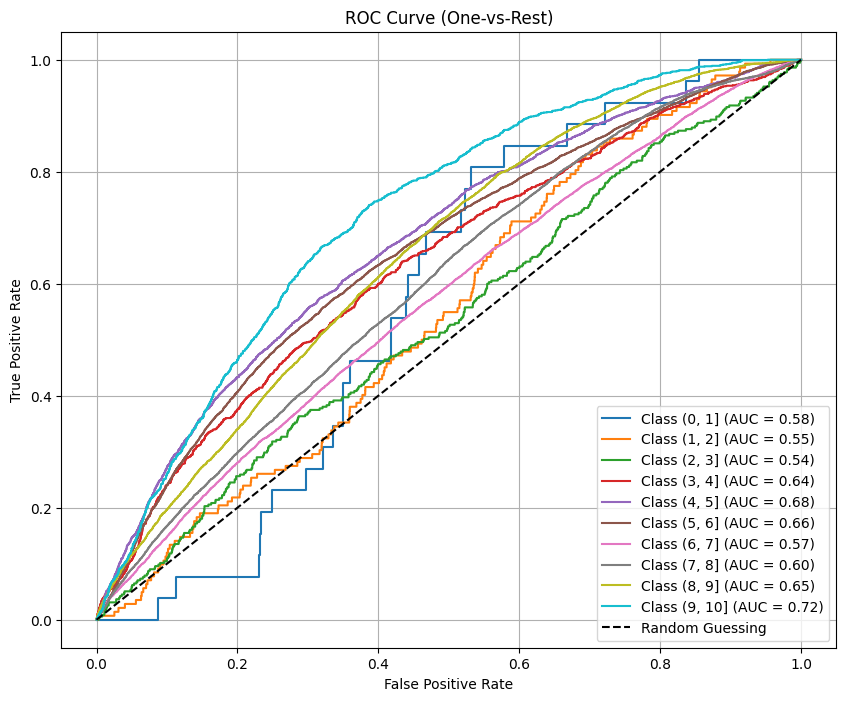

In [20]:
plt.figure(figsize=(10, 8))

for i, class_label in enumerate(classes):
    # ROC curve per la classe i
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    auc = roc_auc_score(y_test_binarized[:, i], y_prob[:, i])
    
    # Traccia la curva ROC
    plt.plot(fpr, tpr, label=f"Class {class_label} (AUC = {auc:.2f})")

# Linea casuale per riferimento
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")

# Personalizza il grafico
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (One-vs-Rest)")
plt.legend(loc="best")
plt.grid()
plt.show()

In [21]:
# AUC (AREA UNDER THE CURVE, Ti dice quanto bene il modello riesce a distinguere tra le classi.) 
# media di tutte le classi (le singole sono gia nel grafico)
roc_auc_score(y_test_binarized, y_prob, multi_class="ovr", average="macro")

np.float64(0.6177308622567269)

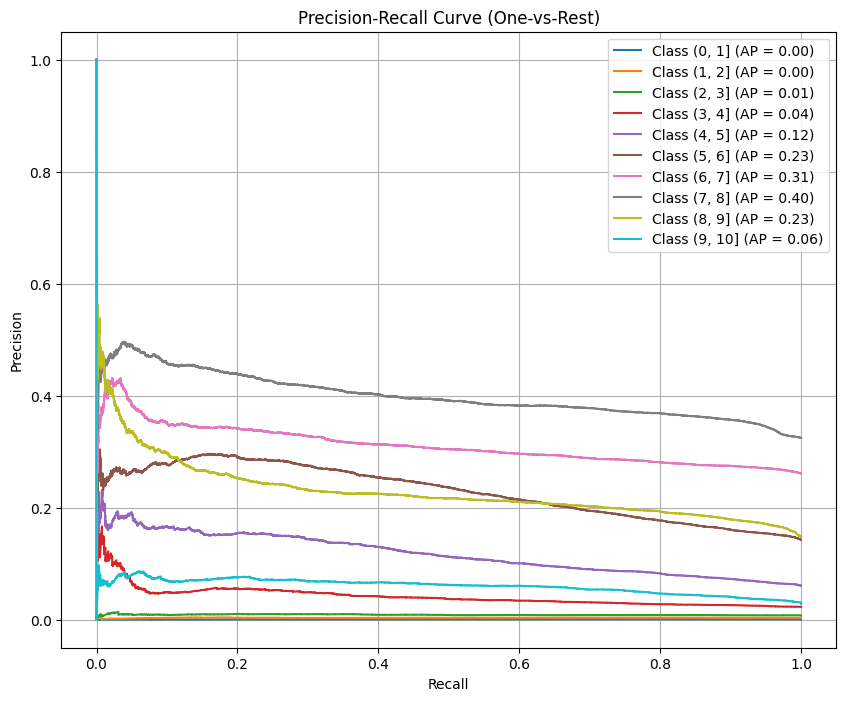

In [22]:
from sklearn.metrics import precision_recall_curve, average_precision_score

plt.figure(figsize=(10, 8))

for i, class_label in enumerate(classes):
    # Precision-Recall curve per la classe i
    precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], y_prob[:, i])
    ap = average_precision_score(y_test_binarized[:, i], y_prob[:, i])
    
    # Traccia la curva Precision-Recall
    plt.plot(recall, precision, label=f"Class {class_label} (AP = {ap:.2f})")

# Personalizza il grafico
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (One-vs-Rest)")
plt.legend(loc="best")
plt.grid()
plt.show()

## Non Linear with subsamples

### linear

In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit

# Stratified subsampling del 10% per la variabile 'rating'
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)

for train_index, test_index in stratified_split.split(X_train, y_train):
    strat_subset_X = X_train[test_index]
    strat_subset_y = y_train[test_index]

# sub-train e validation
subset_X_train, subset_X_val, subset_y_train, subset_y_val = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [ ]:
from sklearn.svm import SVC

# Crea il modello SVM con kernel RBF
model = SVC(kernel='rbf')

# Addestra il modello
model.fit(strat_subset_X, strat_subset_y)

# Fai previsioni
subset_y_pred = model.predict(subset_X_val)

print('Accuracy %s' % accuracy_score(subset_y_val, subset_y_pred))
print('F1-score %s' % f1_score(subset_y_val, subset_y_pred, average=None))
print(classification_report(subset_y_val, subset_y_pred))

Accuracy 0.32472135532768615
F1-score [0.         0.         0.         0.         0.         0.
 0.         0.49024854 0.         0.        ]


c:\Users\Lavigi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

      (0, 1]       0.00      0.00      0.00        26
      (1, 2]       0.00      0.00      0.00       142
      (2, 3]       0.00      0.00      0.00       355
      (3, 4]       0.00      0.00      0.00      1033
      (4, 5]       0.00      0.00      0.00      2726
      (5, 6]       0.00      0.00      0.00      6398
      (6, 7]       0.00      0.00      0.00     11709
      (7, 8]       0.32      1.00      0.49     14567
      (8, 9]       0.00      0.00      0.00      6620
     (9, 10]       0.00      0.00      0.00      1284

    accuracy                           0.32     44860
   macro avg       0.03      0.10      0.05     44860
weighted avg       0.11      0.32      0.16     44860



c:\Users\Lavigi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Lavigi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split, RandomizedSearchCV, PredefinedSplit, GridSearchCV

best_hyper = []
    
for _ in range(10):
    # Stratified subsampling del 10% per la variabile 'rating'
    stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.1)

    for train_index, test_index in stratified_split.split(X_train, y_train):
        strat_subset_X = X_train[test_index]
        strat_subset_y = y_train[test_index]

    # sub-train e validation
    subset_X_train, subset_X_val, subset_y_train, subset_y_val = train_test_split(strat_subset_X, strat_subset_y, test_size=0.3, random_state=100, stratify=strat_subset_y)

    # 2️⃣ Creare un array per il PredefinedSplit (-1 = train, 0 = validation)
    split_index = np.concatenate([-np.ones(len(subset_X_train)), np.zeros(len(subset_X_val))])
    ps = PredefinedSplit(test_fold=split_index)

    # 3️⃣ Definire la distribuzione dei parametri per la ricerca casuale
    param_dist = {
        'C': np.logspace(-2, 2, 10),  # Valori di C tra 0.001 e 1000
        'gamma': np.logspace(-3, 1, 10),  # Valori di gamma tra 0.0001 e 100
        'kernel': ['rbf'], #, 'poly', 'sigmoid'
        # 'degree': np.arange(2, 6)  # Solo per il kernel polinomiale
    }

    # 4️⃣ Eseguire la RandomizedSearchCV con l'holdout
    random_search = GridSearchCV(
        SVC(),
        param_grid = param_dist,
        # param_distributions=param_dist,
        # n_iter=4,  # Numero di combinazioni casuali da provare
        scoring='accuracy',
        cv=ps,  # Usa il PredefinedSplit per l'holdout
        n_jobs=-1,
        # random_state=42
    )

    random_search.fit(strat_subset_X, strat_subset_y)

    # 6️⃣ Mostrare i migliori parametri trovati
    print("Migliori parametri:", random_search.best_params_)
    print("Miglior accuracy:", random_search.best_score_)   

    best_hyper.append(random_search.best_params_)
    
# Calcola la media dei migliori C trovati
avg_best_C = np.median([params['C'] for params in best_hyper])
avg_best_gamma = np.median([params['gamma'] for params in best_hyper if isinstance(params['gamma'], float)])

print("Media dei migliori parametri trovati:")
print("C:", avg_best_C)
print("Gamma:", avg_best_gamma)

Migliori parametri: {'C': np.float64(0.5994842503189409), 'gamma': np.float64(0.1668100537200059), 'kernel': 'rbf'}
Miglior accuracy: 0.3833174148360395
Migliori parametri: {'C': np.float64(0.5994842503189409), 'gamma': np.float64(0.1668100537200059), 'kernel': 'rbf'}
Miglior accuracy: 0.3947787328876154
Migliori parametri: {'C': np.float64(1.6681005372000592), 'gamma': np.float64(0.1668100537200059), 'kernel': 'rbf'}
Miglior accuracy: 0.38459089461954793
Migliori parametri: {'C': np.float64(1.6681005372000592), 'gamma': np.float64(0.05994842503189409), 'kernel': 'rbf'}
Miglior accuracy: 0.39063992359121297
Migliori parametri: {'C': np.float64(1.6681005372000592), 'gamma': np.float64(0.1668100537200059), 'kernel': 'rbf'}
Miglior accuracy: 0.3779051257561286
Migliori parametri: {'C': np.float64(4.6415888336127775), 'gamma': np.float64(0.021544346900318832), 'kernel': 'rbf'}
Miglior accuracy: 0.3814071951607768
Migliori parametri: {'C': np.float64(1.6681005372000592), 'gamma': np.float64

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

# Crea il modello SVM con kernel RBF e i parametri forniti
model = SVC(kernel='rbf', C=1.6681005372000592, gamma=0.1668100537200059, probability=True)

# Addestra il modello
model.fit(X_train, y_train)

# Fai previsioni
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)


In [ ]:
from sklearn.preprocessing import label_binarize

classes = np.unique(df['rating'])

# Binarizza le etichette di test
y_test_binarized = label_binarize(y_test, classes=classes)

# Stampa i risultati
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

#### ROC

In [ ]:
plt.figure(figsize=(10, 8))

for i, class_label in enumerate(classes):
    # ROC curve per la classe i
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    auc = roc_auc_score(y_test_binarized[:, i], y_prob[:, i])
    
    # Traccia la curva ROC
    plt.plot(fpr, tpr, label=f"Class {class_label} (AUC = {auc:.2f})")

# Linea casuale per riferimento
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")

# Personalizza il grafico
plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.title("ROC Curve (One-vs-Rest)", fontsize=16)
plt.legend(loc="best")
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

plt.figure(figsize=(10, 8))

for i, class_label in enumerate(classes):
    # Precision-Recall curve per la classe i
    precision, recall, _ = precision_recall_curve(y_test_binarized[:, i], y_prob[:, i])
    ap = average_precision_score(y_test_binarized[:, i], y_prob[:, i])
    
    # Traccia la curva Precision-Recall
    plt.plot(recall, precision, label=f"Class {class_label} (AP = {ap:.2f})")

# Personalizza il grafico
plt.xlabel("Recall", fontsize=14)
plt.ylabel("Precision", fontsize=14)
plt.title("Precision-Recall Curve (One-vs-Rest)", fontsize=16)
plt.legend(loc="best")
plt.grid()
plt.show()